<a href="https://colab.research.google.com/github/joaomarcosmb/ml-ufc/blob/main/lista-01/Lista01_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Questão 1

In [62]:
X_original, y_original = np.loadtxt('artificial1d.csv', delimiter=',', skiprows=1, unpack=True)
print(X_original)

[-0.93103448 -0.86206897 -0.79310345 -0.72413793 -0.65517241 -0.5862069
 -0.51724138 -0.44827586 -0.37931034 -0.31034483 -0.24137931 -0.17241379
 -0.10344828 -0.03448276  0.03448276  0.10344828  0.17241379  0.24137931
  0.31034483  0.37931034  0.44827586  0.51724138  0.5862069   0.65517241
  0.72413793  0.79310345  0.86206897  0.93103448  1.        ]


## Item A

O modelo de regressão linear é dado por
$$\hat{\boldsymbol{y}} = f(x) = w_0 + w_1x.$$

O dataset apresenta pares numéricos $(x_{i}, y_{i})$. O item a pede os parâmetros do modelo, isto é, $w_0$ (viés) e $w_1$ (peso) calculados a partir do método OLS (Ordinary Least Squares).

No formato matricial,
$$\hat{\boldsymbol{y}} = \boldsymbol{X}\boldsymbol{w}.$$

Do OLS, temos que o vetor $\boldsymbol{w}$ que minimiza a função de custo é dado por:
$$\hat{\boldsymbol{w}} = (\boldsymbol{X}^{\top}\boldsymbol{X})^{-1} \boldsymbol{X}^{\top}\boldsymbol{y}$$

Onde $\boldsymbol{X}$ é a matriz de vetores de entrada e $\boldsymbol{y}$ é o vetor de saídas desejadas.

In [63]:
# Cria coluna de 1s para o intercepto w_0
ones_matrix = np.ones((X_original.shape[0], 1))
# Concatena ones_matrix com X
X_with_bias = np.c_[ones_matrix, X_original]

In [64]:
def fit_ols(X, y):
  return np.linalg.inv(X.T @ X) @ X.T @ y

In [65]:
w_hat = fit_ols(X_with_bias, y_original)

w_0, w_1 = w_hat[0], w_hat[1]
print(f"w_0 (intercepto/viés) = {w_0:.6f}")
print(f"w_1 (peso) = {w_1:.6f}")

w_0 (intercepto/viés) = 0.089561
w_1 (peso) = 1.513283


Para o cáclulo do MSE (Mean Squared Error), temos:
$$\mathrm{MSE} = \frac{1}{n}\sum_i^n (\boldsymbol{y} - \hat{\boldsymbol{y}})^2$$

In [66]:
def calc_mse(X, y, y_hat):
  y = y.reshape(-1, 1)              # Garante (N,1)
  y_hat = y_hat.reshape(-1, 1)      # Garante (N,1)
  N = X.shape[0]
  return 1 / N * ((y - y_hat) ** 2).sum(axis=None)

In [67]:
y_hat = X_with_bias @ w_hat
mse = calc_mse(X_with_bias, y_original, y_hat)
print(f"MSE = {mse:.6f}")

MSE = 0.207712


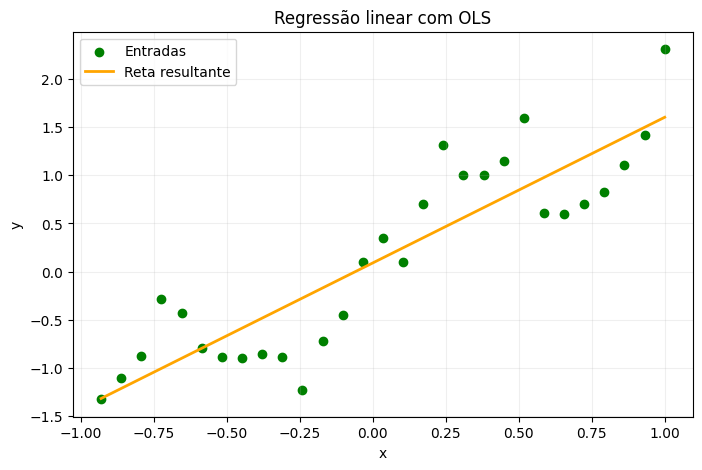

In [68]:
plt.figure(figsize=(8, 5))
plt.scatter(X_with_bias[:, 1], y_original, color='green', label='Entradas')
plt.plot(X_with_bias[:, 1], y_hat, color='orange', linewidth=2, label='Reta resultante')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão linear com OLS')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

## Item B

De acordo com o algoritmo de gradiente descendente (GD), os parâmetros $\boldsymbol{w}$ podem ser atualizados da seguinte forma:
$$\boldsymbol{w}(t) = \boldsymbol{w}(t-1) + \alpha \frac{1}{N}\sum_{i=1}^{N} e_i(t-1) \boldsymbol{x}_i,$$

Onde
* $t$ é a iteração atual do algoritmo;
* $\alpha$ é o passo de aprendizagem;
* $N$ o número de observações disponíveis;
* e $e_i(t-1) = y_i - \boldsymbol{w}^{\top}(t-1)\boldsymbol{x}_i$.

In [69]:
def fit_gd(X, y, alpha=0.01, n_epochs=2000):
  y_col = y.reshape(-1, 1)           # Garante (N,1), pois y_original é (N,)

  w = np.zeros((X.shape[1], 1))      # (2,1)

  N = X.shape[0]

  for i in range(n_epochs):
    # Cálculo das predições
    y_hat = X @ w                    # (N,1)

    # Atualização do erro
    e = y_col - y_hat                # (N,1)

    # Cálculo do gradiente
    grad = (X.T @ e) / N             # (2,1)

    # Atualização dos pesos
    w = w + alpha * grad

  return w

In [70]:
w_gd = fit_gd(X_with_bias, y_original)  # (2,1)

# .ravel() convert de (N, 1) p/ (N,)
w_0_gd, w_1_gd = w_gd.ravel().tolist()            # Achata o array e transforma em uma lista
print(f"w_0 (intercepto/viés) = {w_0_gd:.6f}")
print(f"w_1 (peso) = {w_1_gd:.6f}")

w_0 (intercepto/viés) = 0.089661
w_1 (peso) = 1.511351


In [71]:
y_hat_gd = X_with_bias @ w_gd

mse_gd = calc_mse(X_with_bias, y_original, y_hat_gd)
print(f"MSE = {mse_gd:.6f}")

MSE = 0.207714


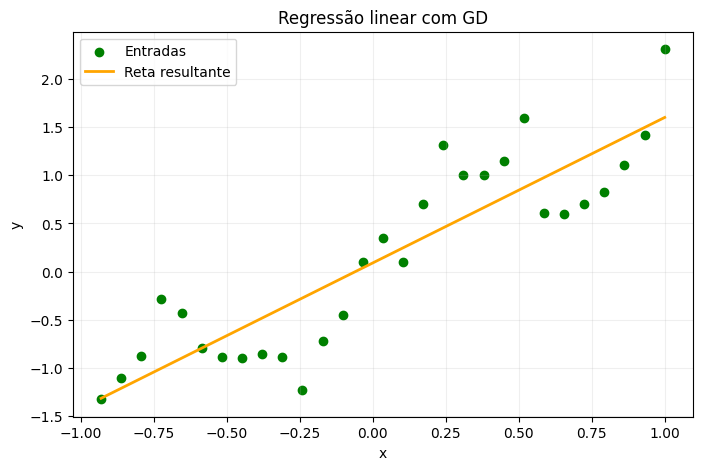

In [72]:
plt.figure(figsize=(8, 5))
plt.scatter(X_with_bias[:, 1], y_original, color='green', label='Entradas')
plt.plot(X_with_bias[:, 1], y_hat_gd, color='orange', linewidth=2, label='Reta resultante')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão linear com GD')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

## Item C

Segundo o algoritmo de SGD, os parâmetros $\boldsymbol{w}$ podem ser atualizados via algoritmo SGD:

$$\boldsymbol{w}(t) = \boldsymbol{w}(t-1) + \alpha e_i(t-1) \boldsymbol{x}_i,$$

Onde
$$e_i(t-1) = y_i - \boldsymbol{w}^{\top}(t-1)\boldsymbol{x}_i.$$


In [73]:
def fit_sgd(X, y, alpha=0.01, n_epochs=2000, seed=42):
  # Cria uma instância da classe Generator (para gerar números aleatórios)
  rng = np.random.default_rng(seed)  # seed determina reprodutibilidade

  N = X.shape[0]

  w = np.zeros((X.shape[1], 1))

  for _ in range(n_epochs):
    # Embaralha os índices a cada época
    idx = rng.permutation(N)                # Array de índices permutados

    for i in idx:
      # Seleciona uma amostra
      xi = X[i:i+1].T                       # (N, 1)
      yi = y[i:i+1]                         # (1, 1)

      # Cálculo da predição para esta amostra
      y_hat_i = w.T @ xi                    # (1, 1)

      # Cálculo do erro da amostra
      ei = yi - y_hat_i                     # (1, 1)

      grad = xi * ei                        # (N, 1)

      # Atualização do SGD
      w = w + alpha * grad

  return w

In [74]:
w_sgd = fit_sgd(X_with_bias, y_original)

w_0_sgd, w_1_sgd = w_sgd.ravel().tolist()
print(f"w_0 (intercepto/viés) = {w_0_sgd:.6f}")
print(f"w_1 (peso) = {w_1_sgd:.6f}")

w_0 (intercepto/viés) = 0.086885
w_1 (peso) = 1.512404


In [75]:
y_hat_sgd = X_with_bias @ w_sgd

mse_sgd = calc_mse(X_with_bias, y_original, y_hat_sgd)
print(f"MSE = {mse_sgd:.6f}")

MSE = 0.207720


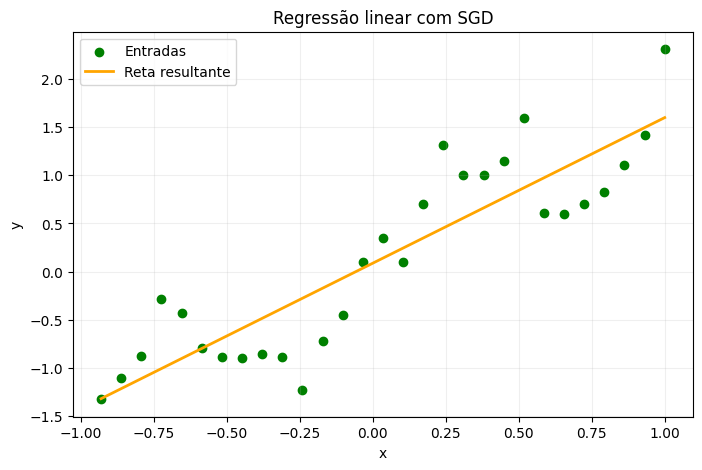

In [76]:
plt.figure(figsize=(8, 5))
plt.scatter(X_with_bias[:, 1], y_original, color='green', label='Entradas')
plt.plot(X_with_bias[:, 1], y_hat_sgd, color='orange', linewidth=2, label='Reta resultante')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão linear com SGD')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

# Questão 2

In [77]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [78]:
dataset_california = np.loadtxt('california.csv', delimiter=',')
print(dataset_california)

[[   4.1685       20.            6.70063694 ...   38.8
  -121.15          2.175     ]
 [   2.8194       24.            4.7625     ...   36.75
  -119.85          0.811     ]
 [   2.425        46.            4.92771084 ...   36.33
  -119.31          0.849     ]
 ...
 [   4.7308       35.            5.66666667 ...   33.83
  -118.37          3.534     ]
 [   4.2788       10.            5.375      ...   33.68
  -117.35          1.25      ]
 [   2.8036       18.            3.27400881 ...   34.1
  -118.35          2.25      ]]


In [79]:
X_original = dataset_california[:, :-1] # Seleciona as 8 primeiras colunas
y_original = dataset_california[:, -1]  # Seleciona a última coluna

É necessário regularizar as entradas usando o método MinMax, de forma que:
$$X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}},$$

Onde
* $X$
* $X_{\text{min}}$
* $X_{\text{max}}$

In [80]:
inputScaler = MinMaxScaler()
X_scaled = inputScaler.fit_transform(X_original)

Já as saídas devem ser regularizadas utilizando o StandardScaler

In [81]:
output_scaler = StandardScaler()
y_scaled = output_scaler.fit_transform(y_original.reshape(-1, 1))

## Item A

Para fazer uma divisão aleatoria de treino/teste manualmente,

1.   os elementos de cada vetor serão permutados,
2.   e depois serão selecionados de acordo com a proporção indicada.



In [82]:
def train_test_split(X, y, test_size=0.2, random_state=42):
  if random_state is not None:
    np.random.seed(random_state)

  N_samples = X.shape[0]
  N_test = int(N_samples * test_size)

  # Permuta aleatoriamente os índices
  idxs = np.random.permutation(N_samples)

  # Separa os índices de treino e teste
  test_idxs = idxs[:N_test]
  train_idxs = idxs[N_test:]

  return X[train_idxs], y[train_idxs], X[test_idxs], y[test_idxs]

In [83]:
X_train, y_train, X_test, y_test = train_test_split(X_scaled, y_scaled)

## Itens B, C e D

In [84]:
# Desnormaliza as saídas
y_train_denorm = output_scaler.inverse_transform(y_train)
y_test_denorm = output_scaler.inverse_transform(y_test)

In [85]:
max_degree = 13
degrees = range(1, 14)

### Versão com uso do `sklearn`

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor

In [87]:
poly_interaction = PolynomialFeatures(degree=max_degree, include_bias=True, interaction_only=True)
poly_interaction.fit(X_train)
powers_interaction = poly_interaction.powers_

feature_masks_interaction = {}
for degree in degrees:
  feature_masks_interaction[degree] = np.sum(powers_interaction, axis=1) <= degree

X_train_poly_interaction = poly_interaction.transform(X_train)
X_test_poly_interaction = poly_interaction.transform(X_test)

In [88]:
sgd_common_params = dict(
    loss='squared_error',         # Define a função de perda como MSE
    penalty='l2',                 # Define o regularizador como L2 (Ridge)
    max_iter=2000,                # Máximo de épocas
    tol=1e-4,                     # Critério de parada (se melhoria < tol, para)
    learning_rate='constant',
    eta0=0.01,                    # Learning rate inicial
    fit_intercept=False,          # Não se ajusta ao intercepto
    random_state=42,
    n_iter_no_change=10,          # Se não houver melhoria no treinamento durante 10 iter, para
)

rmse_train_sklearn_list = []
rmse_test_sklearn_list = []
rmse_train_sklearn_l2_list = []
rmse_test_sklearn_l2_list = []

for degree in degrees:
  # Cria máscara que indica quais colunas correspondem ao grau atual
  mask = feature_masks_interaction[degree]

  # Filtra apenas os termos do grau especificado
  X_train_deg = X_train_poly_interaction[:, mask]
  X_test_deg = X_test_poly_interaction[:, mask]

  # Modelo sem regularização adicional (alpha=0)
  sgd_plain = SGDRegressor(alpha=0.0, **sgd_common_params)
  sgd_plain.fit(X_train_deg, y_train.ravel())

  # Faz as predições
  y_hat_train_plain = sgd_plain.predict(X_train_deg).reshape(-1, 1)   # (N, 1)
  y_hat_test_plain = sgd_plain.predict(X_test_deg).reshape(-1, 1)     # (N, 1)

  # Desnormaliza saídas
  y_hat_train_plain = output_scaler.inverse_transform(y_hat_train_plain)
  y_hat_test_plain = output_scaler.inverse_transform(y_hat_test_plain)

  # Calcula o RMSE
  rmse_train_plain = np.sqrt(calc_mse(X_train_deg, y_train_denorm, y_hat_train_plain))
  rmse_test_plain = np.sqrt(calc_mse(X_test_deg, y_test_denorm, y_hat_test_plain))

  rmse_train_sklearn_list.append(rmse_train_plain)
  rmse_test_sklearn_list.append(rmse_test_plain)

  # Modelo com regularização L2 (alpha > 0)
  sgd_l2 = SGDRegressor(alpha=0.01, **sgd_common_params)
  sgd_l2.fit(X_train_deg, y_train.ravel())

  y_hat_train_l2 = sgd_l2.predict(X_train_deg).reshape(-1, 1)
  y_hat_test_l2 = sgd_l2.predict(X_test_deg).reshape(-1, 1)

  y_hat_train_l2 = output_scaler.inverse_transform(y_hat_train_l2)
  y_hat_test_l2 = output_scaler.inverse_transform(y_hat_test_l2)

  rmse_train_l2 = np.sqrt(calc_mse(X_train_deg, y_train_denorm, y_hat_train_l2))
  rmse_test_l2 = np.sqrt(calc_mse(X_test_deg, y_test_denorm, y_hat_test_l2))

  rmse_train_sklearn_l2_list.append(rmse_train_l2)
  rmse_test_sklearn_l2_list.append(rmse_test_l2)

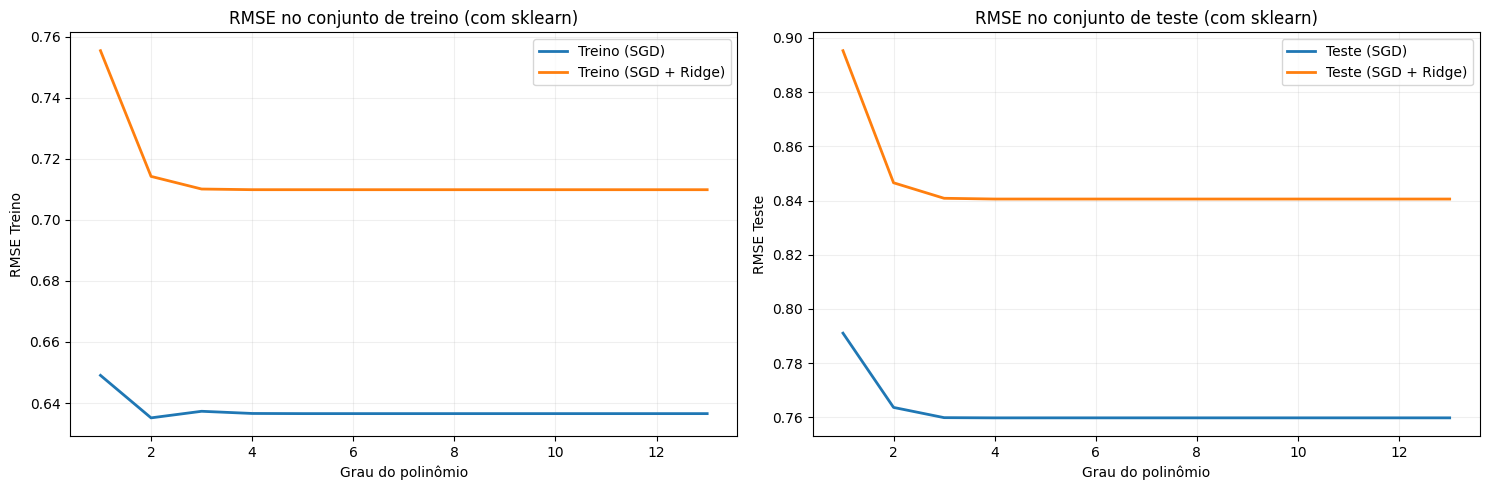

In [89]:
plt.figure(figsize=(15, 5))

# Gráfico de treino
plt.subplot(1, 2, 1)
plt.plot(degrees, rmse_train_sklearn_list, linewidth=2, label='Treino (SGD)')
plt.plot(degrees, rmse_train_sklearn_l2_list, linewidth=2, label='Treino (SGD + Ridge)')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE Treino')
plt.title('RMSE no conjunto de treino (com sklearn)')
plt.legend()
plt.grid(True, alpha=0.2)

# Gráfico de teste
plt.subplot(1, 2, 2)
plt.plot(degrees, rmse_test_sklearn_list, linewidth=2, label='Teste (SGD)')
plt.plot(degrees, rmse_test_sklearn_l2_list, linewidth=2, label='Teste (SGD + Ridge)')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE Teste')
plt.title('RMSE no conjunto de teste (com sklearn)')
plt.legend()
plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

### Versão "manual" (sem sucesso)

Para a regularização L2 (ridge regression), pode-se adotar a otimização via SGD e adicionar o termo penalizador diretamente à atualização dos pesos:
$$\boldsymbol{w}(t) = \boldsymbol{w}(t - 1) + \alpha[e_i(t - 1)\boldsymbol{x}_i-\lambda\boldsymbol{w}(t-1)],$$

Onde
* $\lambda > 0$ é um hiperparâmetro de regularização;
* E o parâmetro $w_0$ (viés) não é regularizado.

In [90]:
def fit_sgd_ridge(X, y, alpha=0.01, lmbda=0.01, n_epochs=2000, seed=42):
  rng = np.random.default_rng(seed)
  N = X.shape[0]
  w = np.zeros((X.shape[1], 1))

  for _ in range(n_epochs):
    # Embaralha os índices a cada época
    idx = rng.permutation(N)                # Array de índices permutados

    for i in idx:
      # Seleciona uma amostra
      xi = X[i:i+1].T                       # (N, 1)
      yi = y[i:i+1]                         # (1, 1)

      # Cálculo da predição para esta amostra
      y_hat_i = w.T @ xi                    # (1, 1)

      # Cálculo do erro da amostra
      ei = yi - y_hat_i                     # (1, 1)

      grad = xi * ei - lmbda * w            # (N, 1)

      # Atualização do SGD
      w = w + alpha * grad

  return w

O uso do `itertools.combinations_with_replacement` é para montar todas as combinações (`combos`) de tamanho $k$ com os elementos do iterável, neste caso, os termos polinomiais, permitindo repetição e sem importar a ordem.

Ela equivale a uma combinação com repetição de `n` elementos tomados `k` a `k`, calculada como
$$C_{rep}(n,k) = \binom{n + k - 1}{k} = \frac{(n+k-1)!}{k!(n-1)!}.$$

Por exemplo, para 2 features e grau 2 (`itertools.combinations_with_replacement([0,1], 2)`), temos `[(0,0), (0,1), (1,1)]`, o que equivale a $x_0^2$, $x_0x_1$ e $x_1^2$, respectivamente.

In [91]:
import itertools

In [92]:
# Combinações de termos polinomiais
def build_polynomial_combos(n_features, max_degree):
  combos_by_degree = {}
  cumulative = []
  for degree in range(1, max_degree + 1):
    new_combos = list(itertools.combinations_with_replacement(range(n_features), degree))
    cumulative.extend(new_combos)
    combos_by_degree[degree] = list(cumulative)

  return combos_by_degree

In [93]:
def polynomial_features_from_combos(X, combos):
  n_samples = X.shape[0]

  # Cria uma matriz onde cada linha corresponde a uma entrada e cada coluna, a um termo polinomial
  X_poly = np.ones((n_samples, len(combos) + 1))  # +1 (coluna) para o viés
  for i, combo in enumerate(combos):
    # Preenche a matriz com os produtos dos atributos
    X_poly[:, i + 1] = np.prod(X[:, combo], axis=1)

  return X_poly

Nota$_{1}$: como uma forma de otimizar o algoritmo, foi implementado um cache dos features polinomiais. Dessa forma, evita-se recalcular todos eles quando `train_polynomial_model` é chamada.

Nota$_{2}$: outra adaptação foi usar o algoritmo de otimização de gradiente descendente estocástico ao invés do OLS, pois o custo computacional deste é muito alto para este caso de um polinômio de grau 13. Em testes, com o OLS não rodou.

In [94]:
poly_feature_combos_cache = build_polynomial_combos(X_train.shape[1], max_degree)
poly_features_cache = {}

for degree in range(1, max_degree + 1):
    combos = poly_feature_combos_cache[degree]
    poly_features_cache[degree] = {
        'train': polynomial_features_from_combos(X_train, combos),
        'test': polynomial_features_from_combos(X_test, combos)
    }

def train_polynomial_model(degree, alpha=0.01, lmbda=0.0, n_epochs=1000):
  poly_features_train = poly_features_cache[degree]['train']
  poly_features_test = poly_features_cache[degree]['test']

  # Ajusta os pesos
  w_hat = fit_sgd_ridge(
      poly_features_train,
      y_train,
      alpha=alpha,
      lmbda=lmbda,
      n_epochs=n_epochs
  )

  # Realiza as predições
  y_hat_train = poly_features_train @ w_hat
  y_hat_test = poly_features_test @ w_hat

  # Desnormaliza as saídas
  y_hat_train = output_scaler.inverse_transform(y_hat_train)
  y_hat_test = output_scaler.inverse_transform(y_hat_test)

  # Calcula RMSE
  rmse_train = np.sqrt(calc_mse(poly_features_train, y_train_denorm, y_hat_train))
  rmse_test = np.sqrt(calc_mse(poly_features_test, y_test_denorm, y_hat_test))

  return rmse_train, rmse_test

KeyboardInterrupt: 

In [ ]:
rmse_train_list = []
rmse_test_list = []

for degree in degrees:
  rmse_train, rmse_test = train_polynomial_model(degree, alpha=0.1) # Sem normalização
  rmse_train_list.append(rmse_train)
  rmse_test_list.append(rmse_test)

In [ ]:
rmse_train_ridge_list = []
rmse_test_ridge_list = []

for degree in degrees:
  rmse_train_ridge, rmse_test_ridge = train_polynomial_model(degree, alpha=0.1, lmbda=0.01) # Com norm. L2
  rmse_train_ridge_list.append(rmse_train_ridge)
  rmse_test_ridge_list.append(rmse_test_ridge)

In [ ]:
plt.figure(figsize=(15, 5))

# Gráfico de treino
plt.subplot(1, 2, 1)
plt.plot(degrees, rmse_train_list, linewidth=2, label='Treino (SGD)')
plt.plot(degrees, rmse_train_ridge_list, linewidth=2, label='Treino (SGD + Ridge)')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE Treino')
plt.title('RMSE no Conjunto de Treino')
plt.legend()
plt.grid(True, alpha=0.2)

# Gráfico de teste
plt.subplot(1, 2, 2)
plt.plot(degrees, rmse_test_list, linewidth=2, label='Teste (SGD)')
plt.plot(degrees, rmse_test_ridge_list, linewidth=2, label='Teste (SGD + Ridge)')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE Teste')
plt.title('RMSE no Conjunto de Teste')
plt.legend()
plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()